<a href="https://colab.research.google.com/github/LaxmanGhadi/ColabProjectsBeginners/blob/main/DL_Project_5_Bone_Age_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from glob import glob
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
import tensorflow as tf


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kmader/rsna-bone-age

100% 9.28G/9.29G [01:17<00:00, 40.9MB/s]
100% 9.29G/9.29G [01:17<00:00, 129MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/rsna-bone-age.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
bone_age_csv = pd.read_csv('/content/boneage-training-dataset.csv')
bone_age_test = pd.read_csv('/content/boneage-test-dataset.csv')

In [ ]:
bone_age_csv

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False
...,...,...,...
12606,15605,50,False
12607,15606,113,False
12608,15608,55,False
12609,15609,150,True


In [ ]:
print(bone_age_csv.loc[bone_age_csv['id'] == '15610'])

Empty DataFrame
Columns: [id, boneage, male]
Index: []


In [ ]:
bone_age_test['Case ID']

0      4360
1      4361
2      4362
3      4363
4      4364
       ... 
195    4555
196    4556
197    4557
198    4558
199    4559
Name: Case ID, Length: 200, dtype: int64

In [ ]:
age  = bone_age_csv['id'].map(lambda x: '{}.png'.format(x))

In [ ]:
boneage_mean  =  bone_age_csv['boneage'].mean()
boneage_div = 2*bone_age_csv['boneage'].std()
bone_age_csv['path'] = bone_age_csv['id'].map(lambda x: os.path.join('/content',
                                                         'boneage-training-dataset',
                                                         'boneage-training-dataset',
                                                         '{}.png'.format(x)))
bone_age_csv['exists'] = bone_age_csv['path'].map(os.path.exists)
bone_age_csv['fileName'] = bone_age_csv['id'].map(lambda x : str(x)+'.png')
bone_age_csv['gender'] = bone_age_csv['male'].map(lambda x: 'male' if x else 'female')
boneage_mean = bone_age_csv['boneage'].mean()
boneage_div = 2*bone_age_csv['boneage'].std()

boneage_mean = 0
boneage_div = 1.0

bone_age_csv['boneage_zscore'] = bone_age_csv['boneage'].map(lambda x: (x-boneage_mean)/boneage_div)
bone_age_csv['boneage_category'] = pd.cut(bone_age_csv['boneage'],10)
bone_age_csv.dropna(inplace = True)
bone_age_csv.sample(3)

,id,boneage,male,path,exists,fileName,gender,boneage_zscore,boneage_category
9885,12567,50,False,/content/boneage-training-dataset/boneage-trai...,True,12567.png,female,50.0,"(46.4, 69.1]"
6360,8628,186,True,/content/boneage-training-dataset/boneage-trai...,True,8628.png,male,186.0,"(182.6, 205.3]"
9259,11870,150,True,/content/boneage-training-dataset/boneage-trai...,True,11870.png,male,150.0,"(137.2, 159.9]"


In [ ]:
bone_age_csv.shape

(12611, 9)

In [ ]:
# bone_age_csv[['boneage', 'male', 'boneage_zscore']].hist(figsize = (10, 5))
# bone_age_csv['boneage_category'] = pd.cut(bone_age_csv['boneage'], 10)

In [ ]:
train_raw , validation_raw  = train_test_split( bone_age_csv,
                                       test_size=0.25,
                                        random_state = 2018,
                                      stratify= bone_age_csv['boneage_category'] )

In [ ]:
train_raw

,id,boneage,male,path,exists,fileName,gender,boneage_zscore,boneage_category
2110,3726,162,False,/content/boneage-training-dataset/boneage-trai...,True,3726.png,female,162.0,"(159.9, 182.6]"
2066,3680,42,False,/content/boneage-training-dataset/boneage-trai...,True,3680.png,female,42.0,"(23.7, 46.4]"
420,1849,101,True,/content/boneage-training-dataset/boneage-trai...,True,1849.png,male,101.0,"(91.8, 114.5]"
11116,13950,156,True,/content/boneage-training-dataset/boneage-trai...,True,13950.png,male,156.0,"(137.2, 159.9]"
2995,4895,96,True,/content/boneage-training-dataset/boneage-trai...,True,4895.png,male,96.0,"(91.8, 114.5]"
...,...,...,...,...,...,...,...,...,...
7601,10002,168,True,/content/boneage-training-dataset/boneage-trai...,True,10002.png,male,168.0,"(159.9, 182.6]"
267,1675,96,True,/content/boneage-training-dataset/boneage-trai...,True,1675.png,male,96.0,"(91.8, 114.5]"
4126,6139,126,False,/content/boneage-training-dataset/boneage-trai...,True,6139.png,female,126.0,"(114.5, 137.2]"
3427,5374,27,False,/content/boneage-training-dataset/boneage-trai...,True,5374.png,female,27.0,"(23.7, 46.4]"


In [ ]:
print('train shape= ',train_raw.shape[0], 'validation shape = ',validation_raw.shape[0])

train shape=  9458 validation shape =  3153


New Data Size: 10000 Old Size: 9458


array([[<Axes: title={'center': 'boneage'}>]], dtype=object)

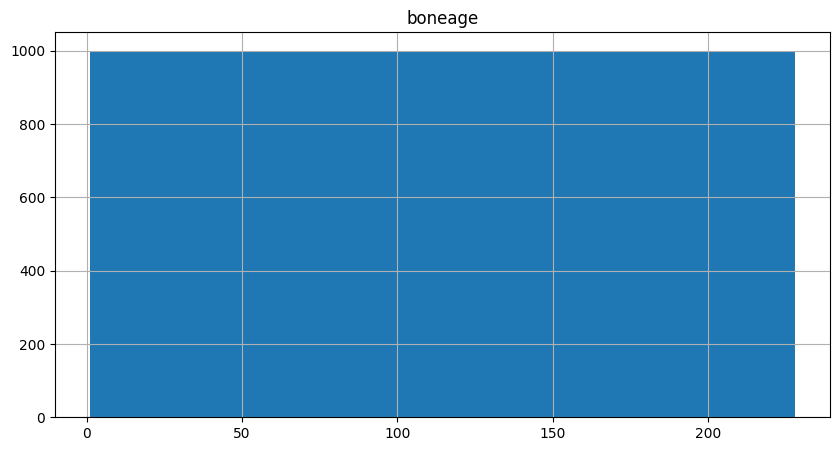

In [ ]:
train = train_raw.groupby(['boneage_category', 'male']).apply(lambda x: x.sample(500, replace = True)
                                                      ).reset_index(drop = True)

print('New Data Size:', train.shape[0], 'Old Size:', train_raw.shape[0])
train[['boneage', 'male']].hist(figsize = (10, 5))

In [ ]:
IMG_SIZE = (384, 384)

train_datagen  = ImageDataGenerator(samplewise_center=False,
                                    samplewise_std_normalization=False,
                                    horizontal_flip=True,
                                    vertical_flip = False,
                                    height_shift_range=0.15,
                                    width_shift_range =0.15,
                                    rotation_range  = 5,
                                    shear_range  = 0.01,
                                    fill_mode = 'nearest',
                                    zoom_range=0.25,
                                    preprocessing_function = preprocess_input
                                    )

In [ ]:
train['boneage_zscore'] = train['boneage_zscore'].astype(str)
validation_raw['boneage_zscore'] = validation_raw['boneage_zscore'].astype(str)

In [ ]:
def get_from_dir(based_dir, in_df,x_col, y_col,bth_sz):
  df_gen = train_datagen.flow_from_dataframe(
            dataframe  = train,
            directory = based_dir,
            x_col = x_col ,
            y_col = None,
            target_size=IMG_SIZE,
            batch_size = bth_sz,
            class_mode = 'sparse',
            color_mode = 'rgb',
        )
  df_gen.classes = np.stack(in_df[y_col])
  df_gen.samples = in_df.shape[0]
  df_gen.samples = in_df.shape[0]
  return df_gen

In [ ]:
image_dir ='/content/boneage-training-dataset/boneage-training-dataset'
train_data_gen = get_from_dir(based_dir = image_dir ,
                              in_df = train,
                              x_col =  "fileName",
                              y_col = 'boneage_zscore',
                              bth_sz = 32)

KeyError: ignored

In [ ]:
image_dir ='/content/boneage-training-dataset/boneage-training-dataset'
train_gen = train_datagen.flow_from_dataframe(
    dataframe  = train,
    directory = image_dir,
    x_col = "fileName" ,
    y_col = None,
    target_size=IMG_SIZE,
    # batch_size = 32,
    class_mode = None,
    color_mode = 'rgb',
)
train_gen.classes = train['boneage_zscore']

validation_gen = train_datagen.flow_from_dataframe(
    dataframe  = validation_raw,
    directory = image_dir,
    x_col = "fileName" ,
    y_col = None,
    target_size=IMG_SIZE,
    # batch_size = 32,
    class_mode = None,
    color_mode = 'rgb',
)

Found 10000 validated image filenames.
Found 3153 validated image filenames.


In [ ]:
test_x  = next(train_datagen.flow_from_dataframe(
    dataframe  = validation_raw,
    directory = image_dir,
    x_col = "fileName" ,
    y_col = None,
    target_size=IMG_SIZE,
    # batch_size = 32,
    class_mode = None,
    color_mode = 'rgb',
))

Found 3153 validated image filenames.


In [ ]:
y_list= list(train['boneage_zscore'])

In [ ]:
train_lables_tensors = tf.constant(y_list)

In [ ]:
train.head()

,id,boneage,male,path,exists,fileName,gender,boneage_zscore,boneage_category
0,7155,9,False,/content/boneage-training-dataset/boneage-trai...,True,7155.png,female,9.0,"(0.773, 23.7]"
1,3655,15,False,/content/boneage-training-dataset/boneage-trai...,True,3655.png,female,15.0,"(0.773, 23.7]"
2,15104,18,False,/content/boneage-training-dataset/boneage-trai...,True,15104.png,female,18.0,"(0.773, 23.7]"
3,9420,18,False,/content/boneage-training-dataset/boneage-trai...,True,9420.png,female,18.0,"(0.773, 23.7]"
4,4217,6,False,/content/boneage-training-dataset/boneage-trai...,True,4217.png,female,6.0,"(0.773, 23.7]"


In [ ]:
vals = []
aa = np.array(train['boneage_zscore'])
uniq_val = np.unique(aa)
vals.append(uniq_val)

In [ ]:
val_arr = np.array(vals)
val_arr = val_arr.reshape(129)

In [ ]:
print((np.array(vals)).shape)

(1, 129)


In [ ]:
# def read_image(list ):
#     image = io.read_file(path)
#     image = tf.image.decode_png(image, channels = 3)
#     augment (image ,label)

In [ ]:
dir ='/content/boneage-training-dataset/boneage-training-dataset/'
import tensorflow as tf

file_paths = train_raw['path'].values
lables = train_raw['boneage_zscore'].values
ds_train = tf.data.Dataset.from_tensor_slices((file_paths, lables))

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model

In [ ]:
# from keras.applications.vgg16 import VGG16
# from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
# from keras.models import Model
# in_lay = Input(t_x.shape[1:])
# base_pretrained_model = VGG16(input_shape =  t_x.shape[1:], include_top = False, weights = 'imagenet')
# base_pretrained_model.trainable = False
# # pt_depth = base_pretrained_model.layers[-1].compute_output_shape()
# pt_depth = base_pretrained_model.layers[-1].output_shape
# pt_features = base_pretrained_model(in_lay)
# from keras.layers import BatchNormalization
# bn_features = BatchNormalization()(pt_features)

# # here we do an attention mechanism to turn pixels in the GAP on an off

# attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
# attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
# attn_layer = LocallyConnected2D(1,
#                                 kernel_size = (1,1),
#                                 padding = 'valid',
#                                 activation = 'sigmoid')(attn_layer)
# # fan it out to all of the channels
# up_c2_w = np.ones((1, 1, 1, pt_depth[-1]))
# up_c2 = Conv2D(pt_depth[-1], kernel_size = (1,1), padding = 'same',
#                activation = 'linear', use_bias = False, weights = [up_c2_w])
# up_c2.trainable = False
# attn_layer = up_c2(attn_layer)

# mask_features = multiply([attn_layer, bn_features])
# gap_features = GlobalAveragePooling2D()(mask_features)
# gap_mask = GlobalAveragePooling2D()(attn_layer)
# # to account for missing values from the attention model
# gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
# gap_dr = Dropout(0.5)(gap)
# dr_steps = Dropout(0.25)(Dense(1024, activation = 'elu')(gap_dr))
# out_layer = Dense(1, activation = 'linear')(dr_steps) # linear is what 16bit did
# bone_age_model = Model(inputs = [in_lay], outputs = [out_layer])
# from keras.metrics import mean_absolute_error
# def mae_months(in_gt, in_pred):
#     return mean_absolute_error(boneage_div*in_gt, boneage_div*in_pred)

# bone_age_model.compile(optimizer = 'adam', loss = 'mse',
#                            metrics = [mae_months])

# bone_age_model.summary()

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
in_lay = Input([384, 384, 3 ])
base_pretrained_model = VGG16(input_shape =  tuple([384, 384, 3 ]), include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
# pt_depth = base_pretrained_model.layers[-1].compute_output_shape()
pt_depth = base_pretrained_model.layers[-1].output_shape
pt_depth2 = (base_pretrained_model.layers[0].output_shape)
tup = tuple(pt_depth2[-1])
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = LocallyConnected2D(1,
                                kernel_size = (1,1),
                                padding = 'valid',
                                activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth[-1]))
up_c2 = Conv2D(pt_depth[-1], kernel_size = (1,1), padding = 'same',
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(1024, activation = 'elu')(gap_dr))
out_layer = Dense(129, activation = 'linear')(dr_steps) # linear is what 16bit did
bone_age_model = Model(inputs = [in_lay], outputs = [out_layer])
from keras.metrics import mean_absolute_error
def mae_months(in_gt, in_pred):
    return mean_absolute_error(boneage_div*in_gt, boneage_div*in_pred)

bone_age_model.compile(optimizer = 'adam', loss = 'mse',
                           metrics = [mae_months])

bone_age_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 12, 12, 512)  14714688    ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 12, 12, 512)  2048       ['vgg16[0][0]']                  
 alization)                                                                                       
                             

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path='/content/bone_age_weights.best.hdf5'

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True,
                             mode='min',
                             save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.8, patience=10,
                                   verbose=1, mode='auto',
                                   min_delta=0.0001,
                                   cooldown=5,
                                   min_lr=0.0001)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

(10000,)

In [ ]:
bone_age_model.fit  (train_gen,train_gen.classes,
                    #  batch_size = 32,
                                  # validation_data = (test_x ,test_y),
                                  epochs = 10,
                                  callbacks = callbacks_list)

ValueError: ignored

In [ ]:
pred_Y = boneage_div*bone_age_model.predict(test_x, batch_size = 32, verbose = True)+boneage_mean
test_Y_months = boneage_div*test_y+boneage_mean

1/1 [==============================] - 1s 1s/step


In [ ]:
t_x,t_y = next(train_gen)

In [ ]:
np.argmax(t_y[0])

36

In [ ]:
t_y_i = []
i = 0
while i < 32:
  ta = np.argmax(t_y[i])
  t_y_i.append(ta)
  i += 1

In [ ]:
print(t_y_i)
values[36]

[36, 29, 112, 95, 41, 23, 32, 50, 103, 73, 16, 23, 50, 32, 75, 84, 84, 61, 32, 46, 35, 75, 84, 23, 77, 56, 118, 64, 119, 127, 23, 80]


NameError: ignored

In [ ]:

for i in t_y_i:


TypeError: ignored

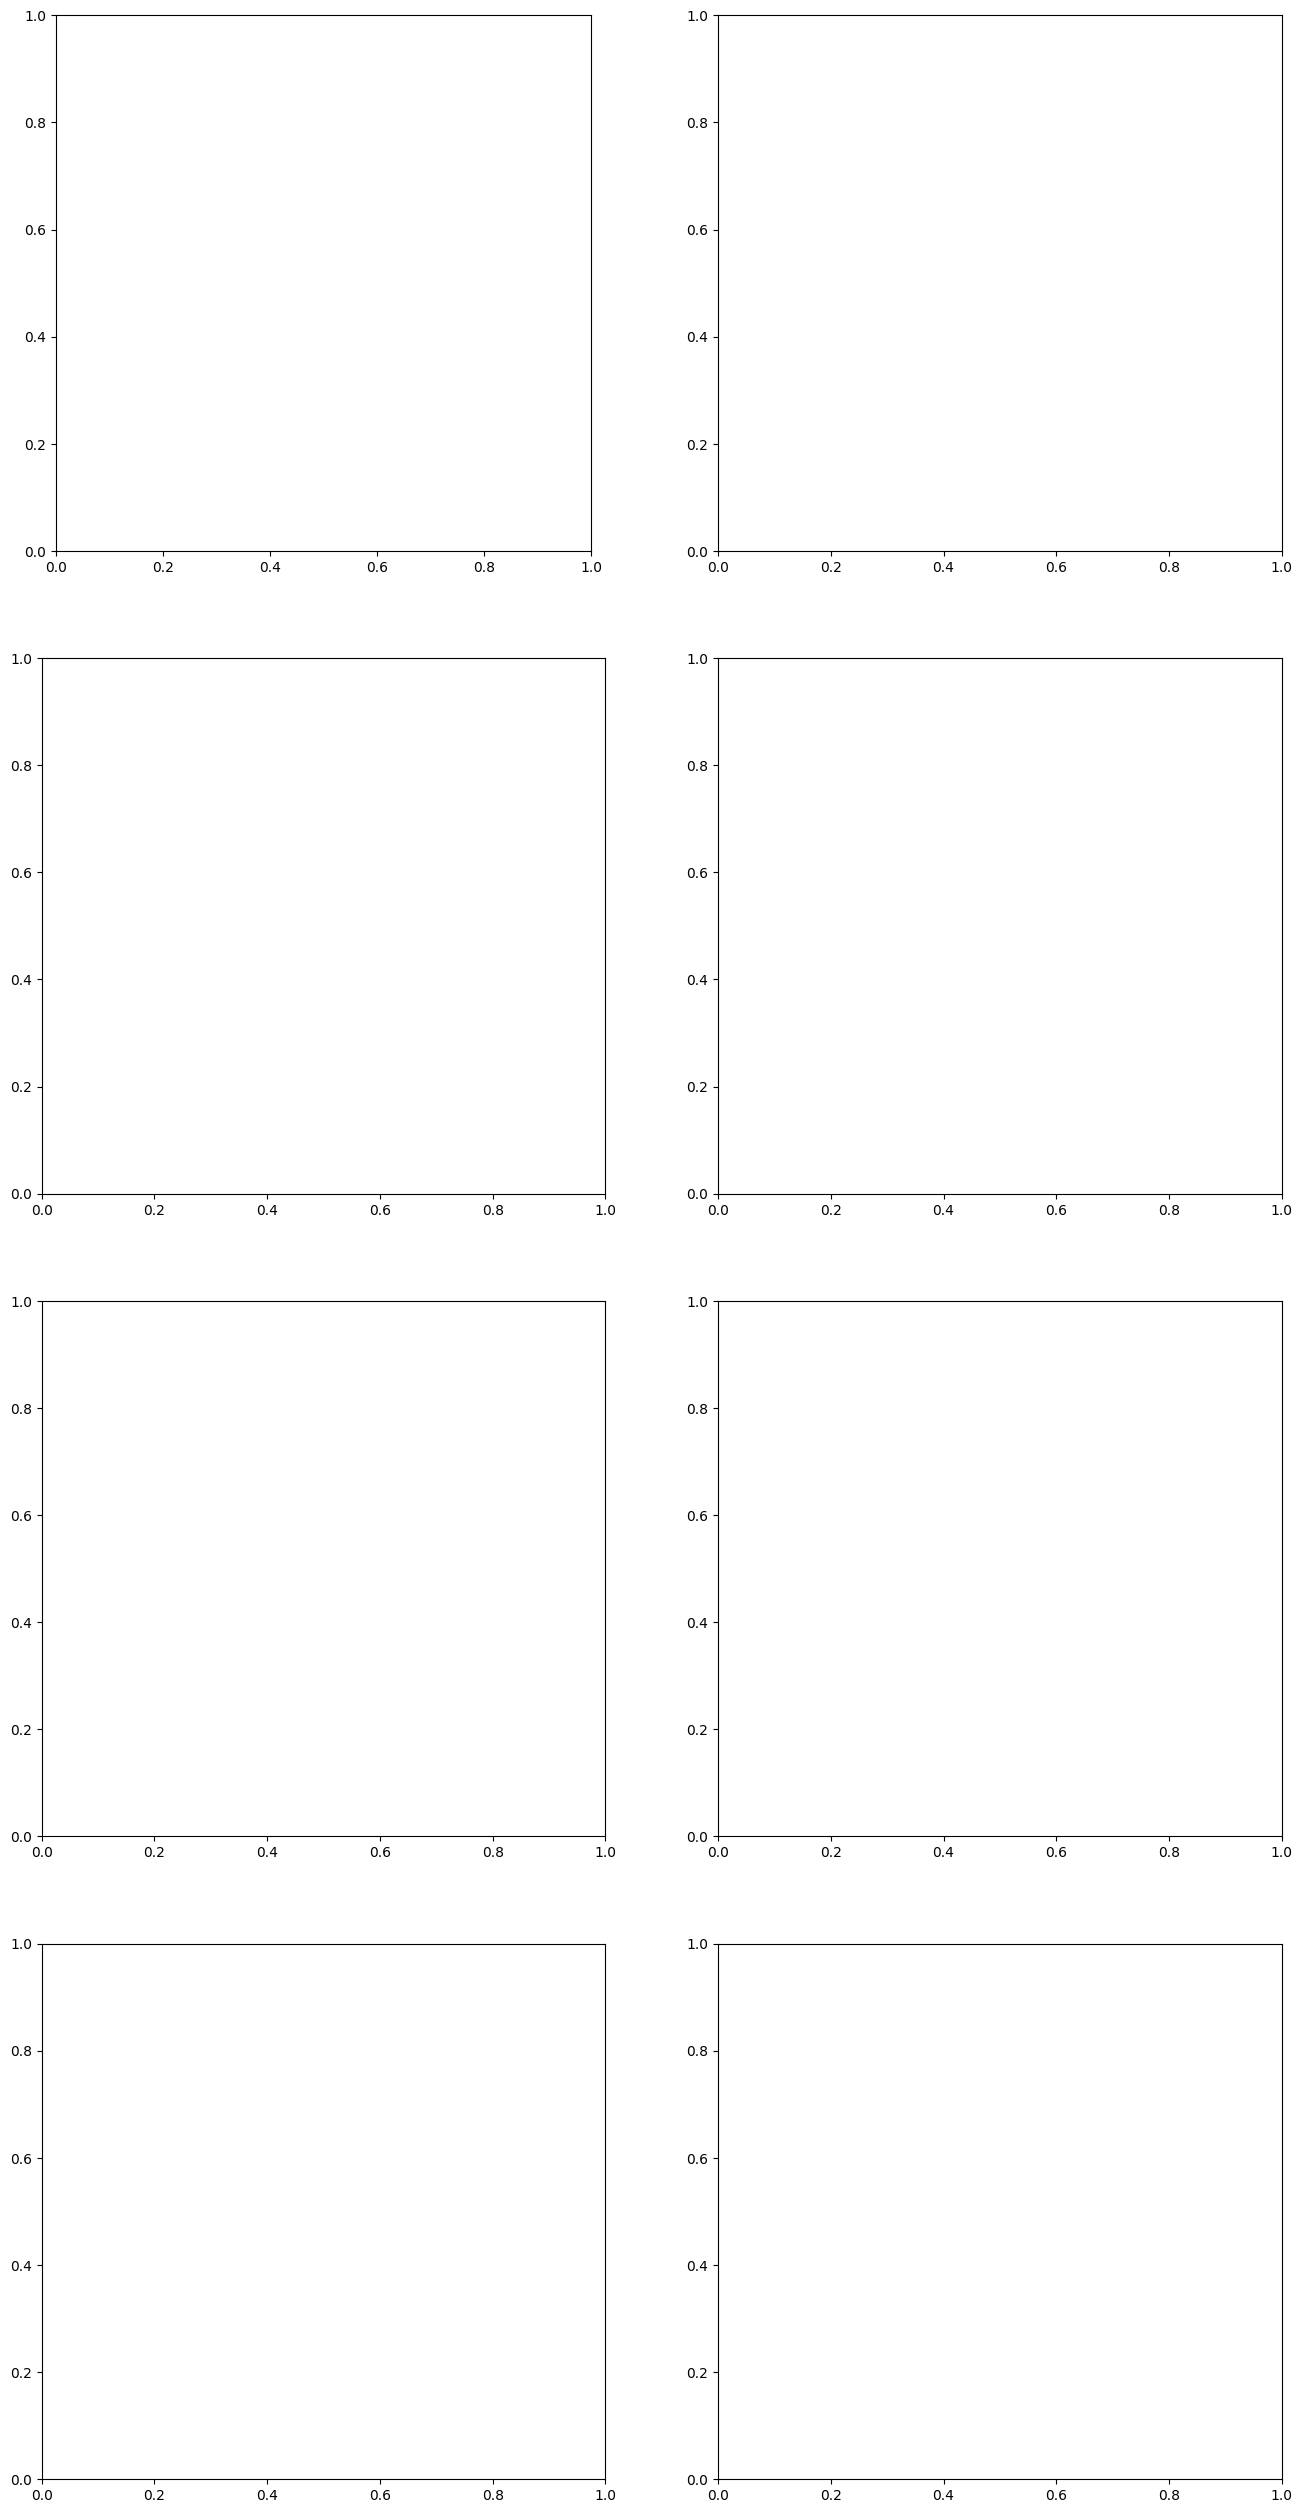

In [ ]:
ord_idx = np.argsort(t_y)
ord_idx = ord_idx[np.linspace(0, len(ord_idx)-1, 8).astype(int)]
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(ord_idx, m_axs.flatten()):
    c_ax.imshow(t_x[idx, :,:,0], cmap = 'bone')

    # c_ax.set_title('Age: %2.1fY\nPredicted Age: %2.1fY' % (test_Y_months[idx]/12.0,
    #                                                        pred_Y[idx]/12.0))
    # c_ax.axis('off')
fig.savefig('trained_img_predictions.png', dpi = 300)

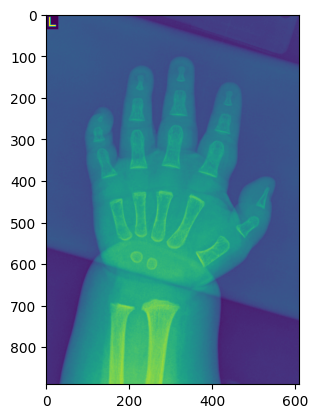

In [ ]:
path = ('/content/boneage-training-dataset/boneage-training-dataset/7155.png')

image = imread(path)
plt.imshow(image)
# image = np.array(image)
# image = image.resize((384,384,3))

In [ ]:
predicted = bone_age_model.predict( test_x )


1/1 [==============================] - 0s 193ms/step


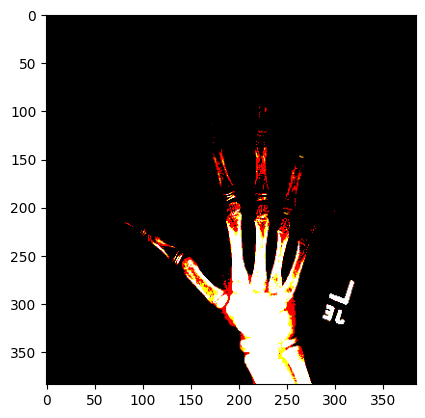

In [ ]:
plt.imshow(test_x[5])

In [ ]:
print((predicted))
import pickle

[[0.00775193]
 [0.00775193]
 [0.00775192]
 [0.00775207]
 [0.00775205]
 [0.00775206]
 [0.00775185]
 [0.00775193]
 [0.0077519 ]
 [0.00775188]
 [0.00775186]
 [0.00775188]
 [0.00775192]
 [0.0077519 ]
 [0.00775207]
 [0.00775202]
 [0.00775195]
 [0.00775192]
 [0.00775187]
 [0.007752  ]
 [0.00775208]
 [0.00775192]
 [0.00775224]
 [0.00775201]
 [0.00775198]
 [0.00775197]
 [0.00775199]
 [0.00775188]
 [0.00775189]
 [0.00775188]
 [0.007752  ]
 [0.0077518 ]]


In [ ]:
with open('boneage_model.pkl','wb') as file :
  pickle.dump(bone_age_model, file)

In [ ]:
test_x[0].shape

(384, 384, 3)

In [ ]:
pr = bone_age_model.predict(test_x[0])

InvalidArgumentError: ignored